This notebook illustrates the code used in the paper ```U. Dobramysl, D. Holcman, Mixed analytical-stochastic simulation method for the recovery of a Brownian gradient source from probability fluxes to small windows, Journal of Computational Physics 355 (2018)```.

To run this notebook, you need a Python 3 installation (e.g. Anaconda) and the python packages `numpy`, `scipy`, `matplotlib`, `seaborn` and `tqdm`. To install them, simply run:

```pip install numpy scipy matplotlib seaborn tqdm```

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style("ticks")
sn.set_context("poster")

import findsource

# Two receptors, half-space

Create `findsource.TwoReceptors` object, with the Green's function for half-space `findsource.G_H`, and the receptors positioned at $(1/2, 0)$ and $(-1/2,0)$.

In [2]:
hs_t = findsource.TwoReceptors(x=[(0.5,0), (-0.5,0)], eps=0.1, G=findsource.G_H)

To visualise where the source could be located, we evaluate the probabilities for a particle hitting a receptor window for a grid of source positions throughout the domain. We then extract the contour lines for specific values of these probabilities to find the curves on which the source can be located.

Text(0, 0.5, '$y$')

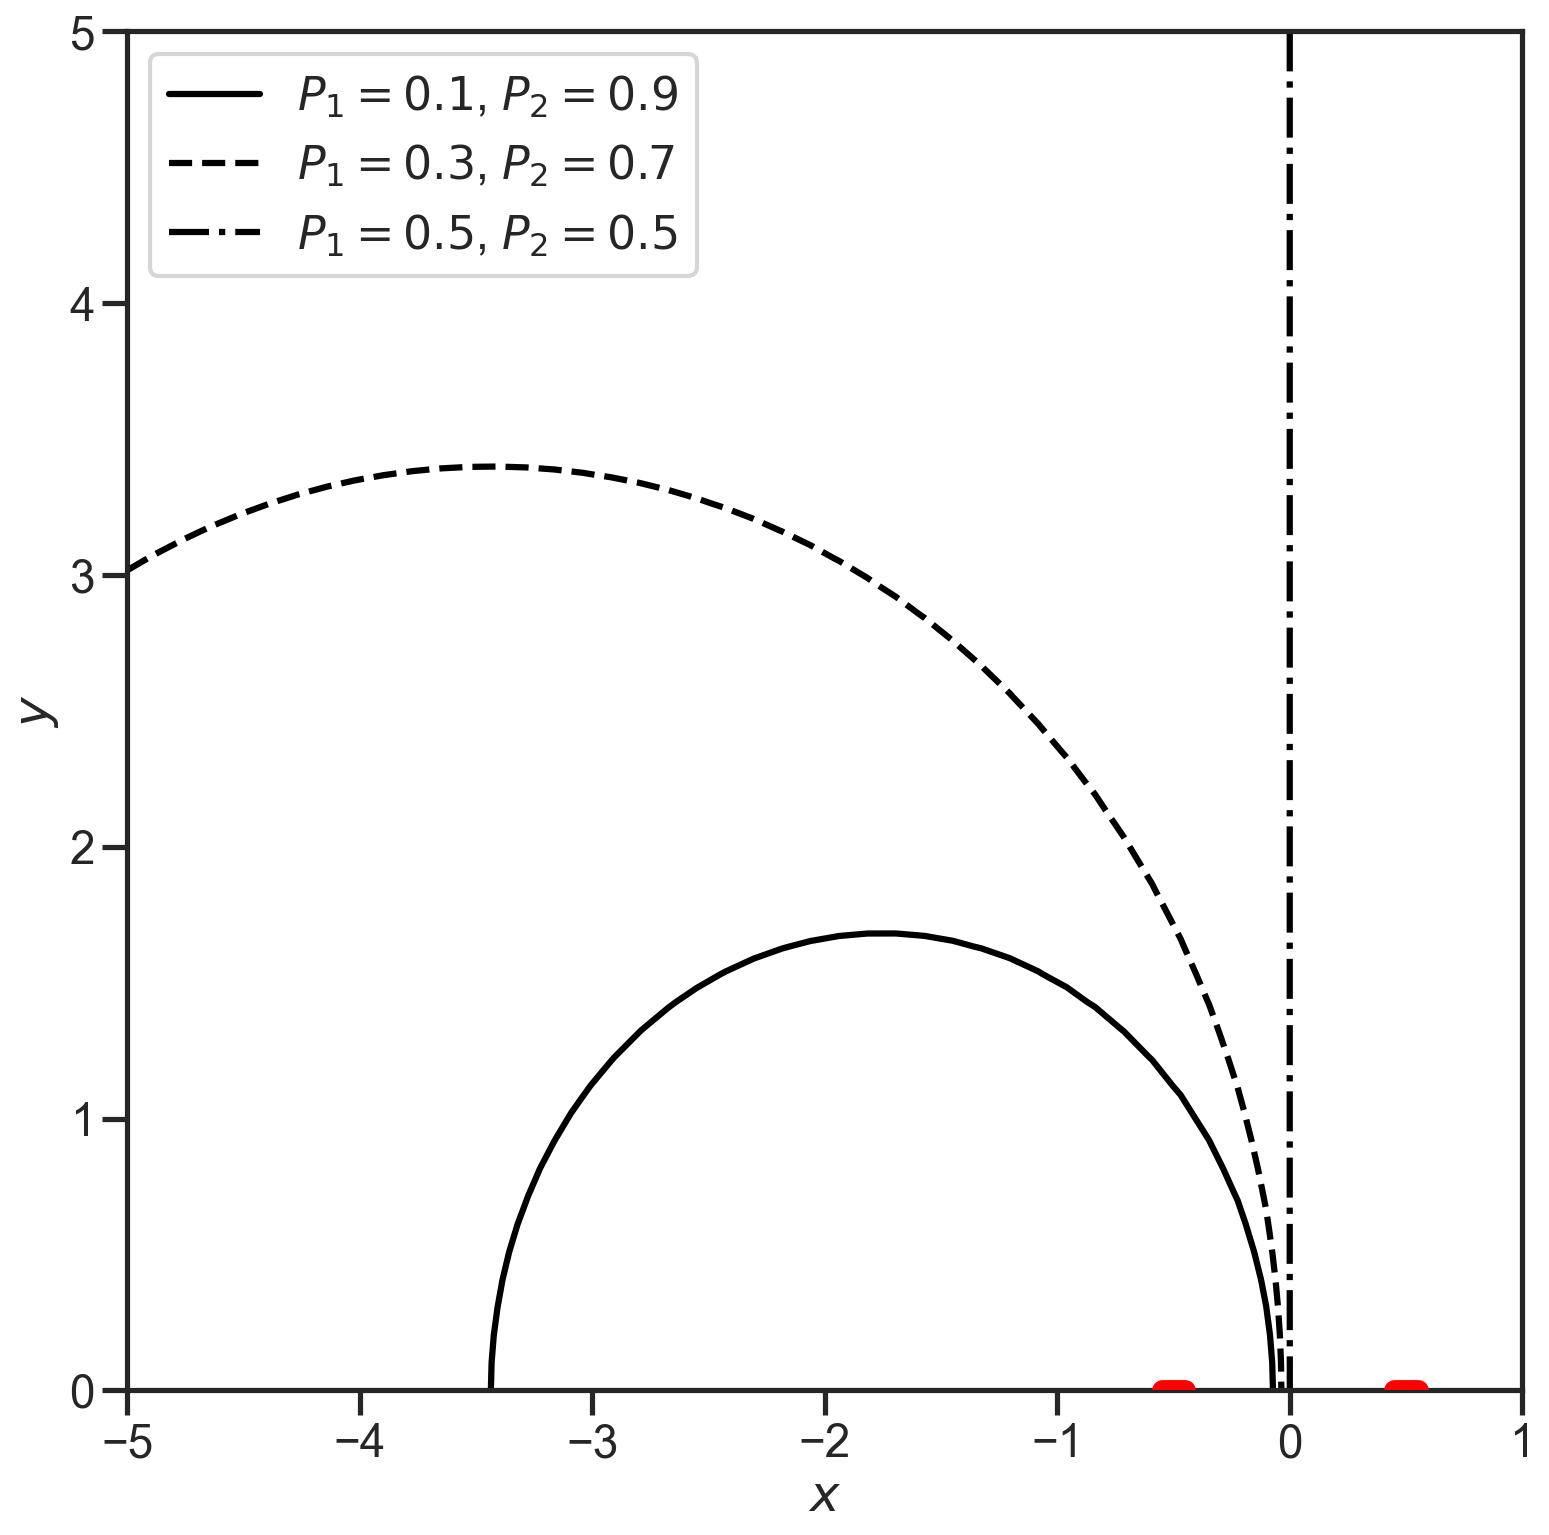

In [3]:
plt.figure(figsize=(12, 12), dpi=150)

hs_cont_x = np.linspace(-5, 1)
hs_cont_y = np.linspace(0, 5)
hs_cont_Ps = [[P, 1.-P] for P in [0.1, 0.3, 0.5, 0.7, 0.9]]
hs_cont_xx = np.array(np.meshgrid(hs_cont_x, hs_cont_y))
flat = hs_cont_xx.reshape((2,-1))
back = np.zeros((flat.shape[1],))

linestyles = ['-', '--', '-.']
for i in range(flat.shape[1]):
    back[i] = hs_t.evaluate(flat[:, i])[0]
hs_cont_levels = back.reshape((hs_cont_xx.shape[1], hs_cont_xx.shape[2]))
for ls, P in zip(linestyles, hs_cont_Ps):
    plt.contour(hs_cont_levels-P[0], [0.0], extent=(hs_cont_x[0], hs_cont_x[-1], hs_cont_y[0], hs_cont_y[-1]), colors=['black'],
                linestyles=[ls])
for x in hs_t.x:
    plt.plot([x[0]-hs_t.eps/2., x[0]+hs_t.eps/2.], [0, 0], lw=10., color='red', zorder=100)
plt.legend([plt.Line2D([0,0],[0,0],color='black',ls=ls) for ls in linestyles],
           ["$P_1={}$, $P_2={}$".format(P[0], P[1]) for P in hs_cont_Ps],
           loc='upper left')
plt.xlabel('$x$')
plt.ylabel('$y$')

#plt.savefig("inverse_2win_halfspace_curves.pdf")

# Two receptors, disk

Create `findsource.TwoReceptors` object, with the Green's function for a disk `findsource.G_D`, and the receptors positioned at $(1, 0)$ and $(\cos[-2\pi/3], \sin[-2\pi/3])$. Note that we pass `disk=True` to set probailities for inside the disk to invalid.

In [4]:
d_t = findsource.TwoReceptors(
    x=[(1,0), (np.cos(-2*np.pi/3.), np.sin(-2*np.pi/3.))],
    eps=0.1, G=findsource.G_D, disk=True)

As before, to visualise where the source could be located, we evaluate the probabilities for a particle hitting a receptor window for a grid of source positions throughout the domain. We then extract the contour lines for specific values of these probabilities to find the curves on which the source can be located.

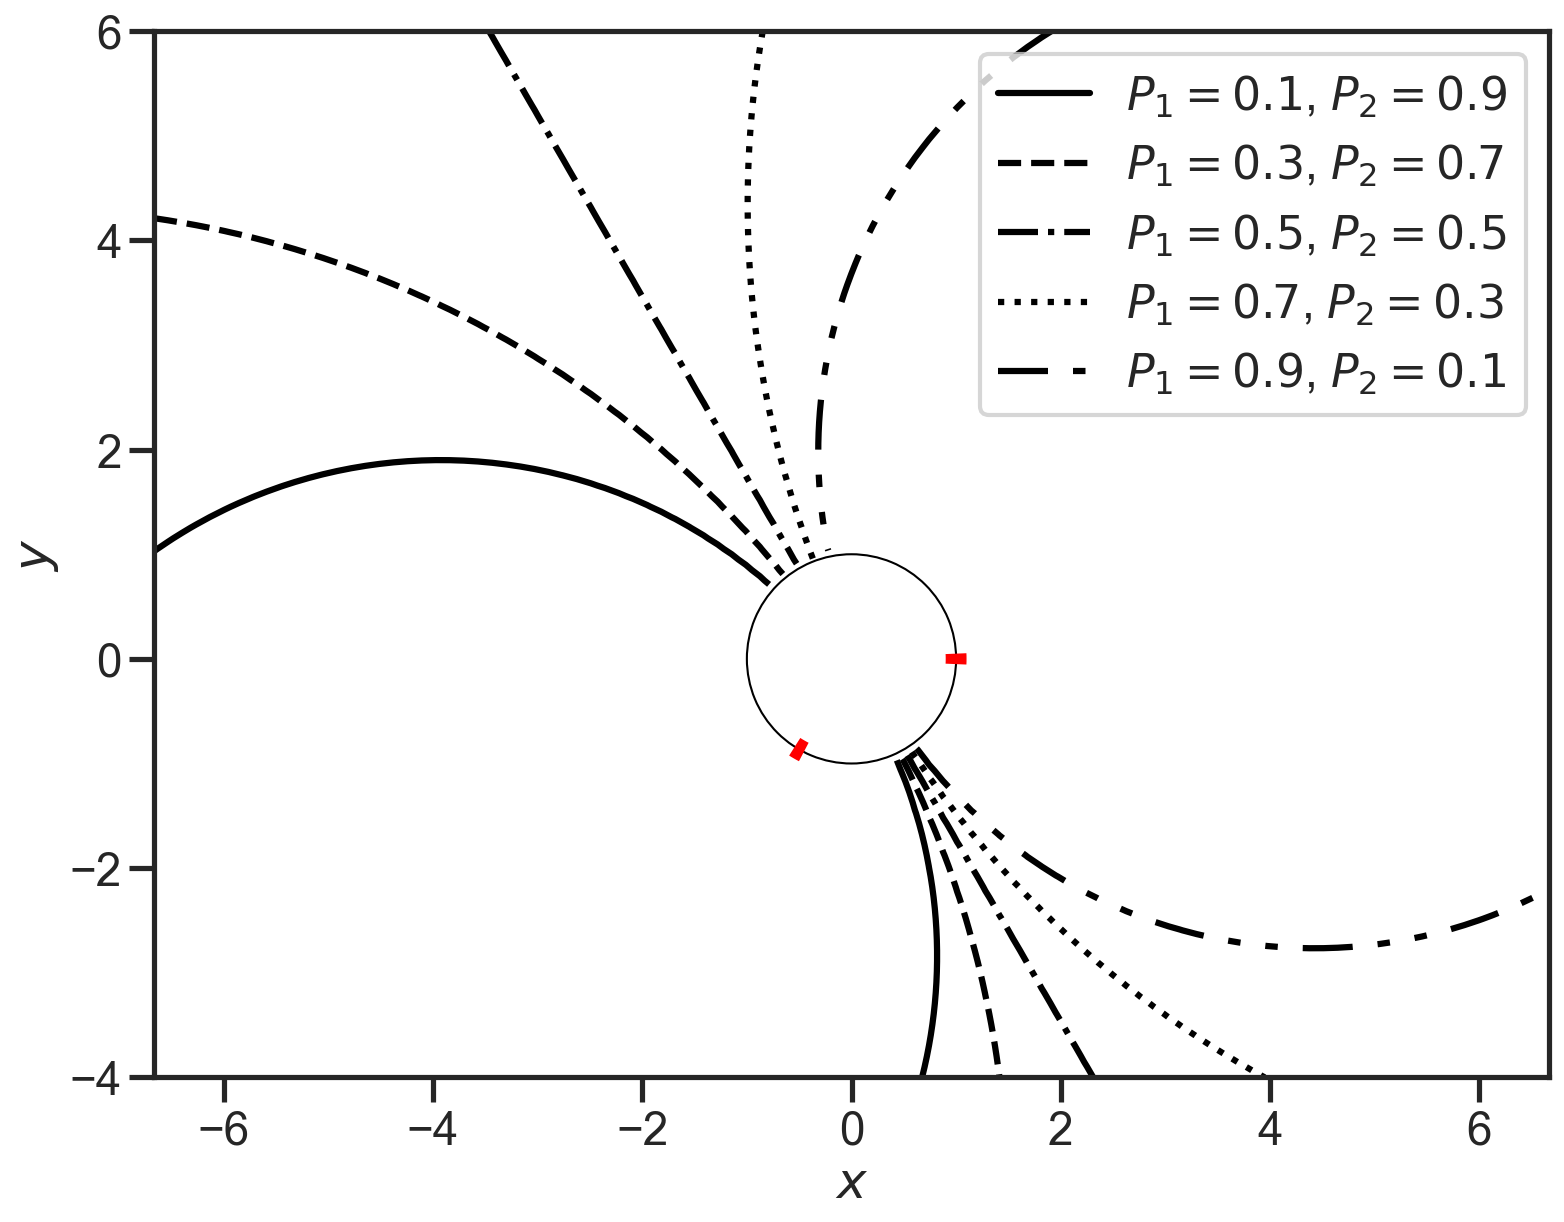

In [5]:
plt.figure(figsize=(12, 12), dpi=150)
ax = plt.subplot(111)
from matplotlib.patches import Arc

d_cont_x = np.linspace(-5, 5, 100) * 4./3.
d_cont_y = np.linspace(-4, 6, 100)
d_cont_P = [0.13,0.05,0.82]
d_cont_Ps = [[P, 1.-P] for P in [0.1, 0.3, 0.5, 0.7, 0.9]]
d_cont_xx = np.array(np.meshgrid(d_cont_x, d_cont_y))
flat = d_cont_xx.reshape((2,-1))
back = np.zeros((flat.shape[1],))

linestyles = ['-','--','-.',':', (0.0, [8, 4, 2, 4, 2, 4])]
for i in range(flat.shape[1]):
    back[i] = d_t.evaluate(flat[:, i])[0]
d_cont_levels = back.reshape((d_cont_xx.shape[1], d_cont_xx.shape[2]))
for ls, P in zip(linestyles, d_cont_Ps):
    plt.contour(d_cont_levels-P[0], [0.0], extent=(d_cont_x[0], d_cont_x[-1], d_cont_y[0], d_cont_y[-1]), colors=['black'],
                linestyles=[ls])

ax.add_patch(Arc((0,0), 2, 2, 0, 0, 360, lw=1., color='black'))
for x in d_t.x:
    angle = np.arctan2(x[1], x[0])*180./np.pi
    da = d_t.eps/2.*180./np.pi
    ax.add_patch(Arc((0,0), 2, 2, 0, angle-da, angle+da, lw=10., color='red'))

plt.legend([plt.Line2D([0,0],[0,0],color='black',ls=ls) for ls in linestyles],
           [f"$P_1={P[0]:3.1f}$, $P_2={P[1]:3.1f}$" for P in d_cont_Ps],
           loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$y$')
ax.set_aspect('equal')

#plt.savefig("inverse_2win_disk_curves.pdf")

# Three receptors, half-space

Create `findsource.ThreeReceptors` object, with the Green's function for half-space `findsource.G_H`, and the receptors positioned at $(-1, 0)$, $(1, 0)$ and $(1,0)$. We also provide guesses for the source position (i.e. starting points for the search function - this is needed further down).

In [ ]:
hs_t = findsource.ThreeReceptors(
    x=[(-1,0), (1,0), (0,0)], eps=0.1,
    G=findsource.G_H,
    guesses=[(0.0, 0.1), (0.0, 1.), (0.0, 3.), (-2., 0.1), (2., 0.1)])

Again, calculate probabilities on a grid and extract contour lines.

Text(0.5, 0.77, '$P_1=0.43$, $P_2=0.27$, $P_3=0.3$')

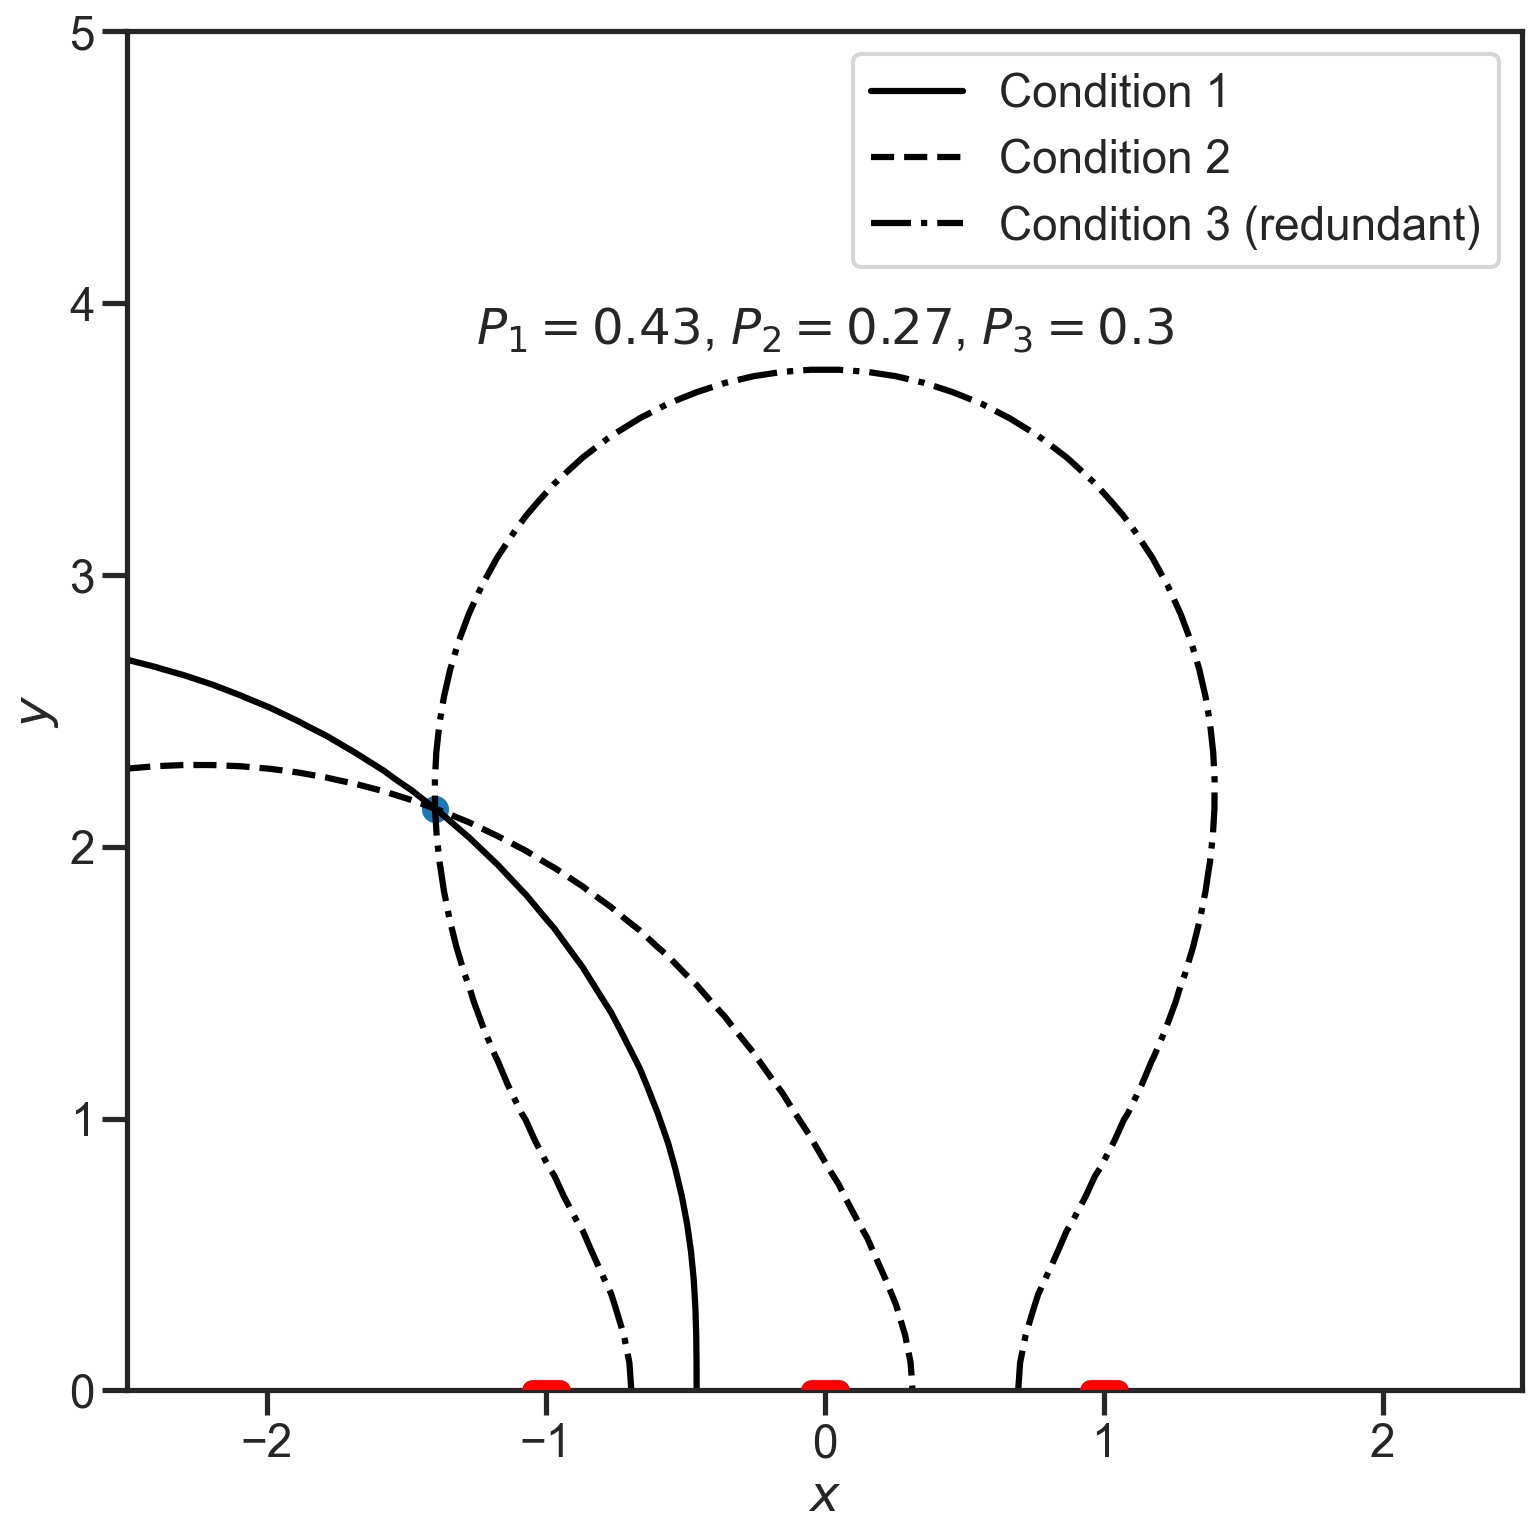

In [10]:
plt.figure(figsize=(12, 12), dpi=150)

hs_cont_x = np.linspace(-2.5, 2.5)
hs_cont_y = np.linspace(0, 5)
extent = (hs_cont_x.min(), hs_cont_x.max(),
          hs_cont_y.min(), hs_cont_y.max())
hs_cont_P = np.array([0.43,0.3,0.27])
point = hs_t.find_point([-3, 4], hs_cont_P)[1]
plt.plot(point[0], point[1], 'o')
hs_cont_xx = np.array(np.meshgrid(hs_cont_x, hs_cont_y))
flat = hs_cont_xx.reshape((2,-1))
back = np.zeros((3, flat.shape[1]))
for i in range(flat.shape[1]):
    back[:, i] = hs_t.evaluate(flat[:, i])
hs_cont_levels = (back-hs_cont_P[:, np.newaxis]).reshape((3, hs_cont_xx.shape[1], hs_cont_xx.shape[2]))
plt.contour(hs_cont_levels[0], [0.0], extent=extent,
            colors=['black'], linestyles=['-'])
plt.contour(hs_cont_levels[1], [0.0], extent=extent,
            colors=['black'], linestyles=['--'])
plt.contour(hs_cont_levels[2], [0.0], extent=extent,
            colors=['black'], linestyles=['-.'])

for x in hs_t.x:
    plt.plot([x[0]-hs_t.eps/2., x[0]+hs_t.eps/2.], [0, 0], lw=10., color='red', zorder=100)
plt.legend([plt.Line2D([0,0],[0,0],color='black',ls='-'),
            plt.Line2D([0,0],[0,0],color='black',ls='--'),
            plt.Line2D([0,0],[0,0],color='black',ls='-.')],
           ['Condition 1', 'Condition 2', 'Condition 3 (redundant)'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text(0.5, 0.77, "$P_1={}$, $P_2={}$, $P_3={}$".format(hs_cont_P[0], hs_cont_P[2], hs_cont_P[1]),
         ha='center', transform=plt.gca().transAxes)

# plt.savefig("inverse_3win_halfspace_curves.pdf")

Calculate the source distance for the whole range of permissible probability values $P_1$, $P_3$ and $P_2=1-P_1-P_3$.

In [11]:
hs_pt = np.linspace(0, 1, 500)
hs_p1, hs_p2 = np.meshgrid(hs_pt, hs_pt)
mask = (hs_p1+hs_p2) < 1.0
hs_P = np.array([hs_p1, hs_p2, 1.-hs_p1-hs_p2])
hs_x0 = np.nan*np.ones((2, hs_P.shape[1], hs_P.shape[2]))
hs_x0[:, mask] = hs_t.scan_P(hs_P[:, mask])

  0%|          | 0/125026 [00:00<?, ?it/s]

Do the same, but only along the line $P_1=P_3$.

In [12]:
hs_p_1d = np.linspace(0, 0.38, 10000)
hs_P_1d = np.array([hs_p_1d, hs_p_1d, 1.-2*hs_p_1d])
hs_x0_1d = np.nan*np.ones((2, hs_P_1d.shape[1]))
hs_x0_1d = hs_t.scan_P(hs_P_1d)

  0%|          | 0/10000 [00:00<?, ?it/s]

Show the distance of the source as a function of $P_1$ and $P_3$.

[]

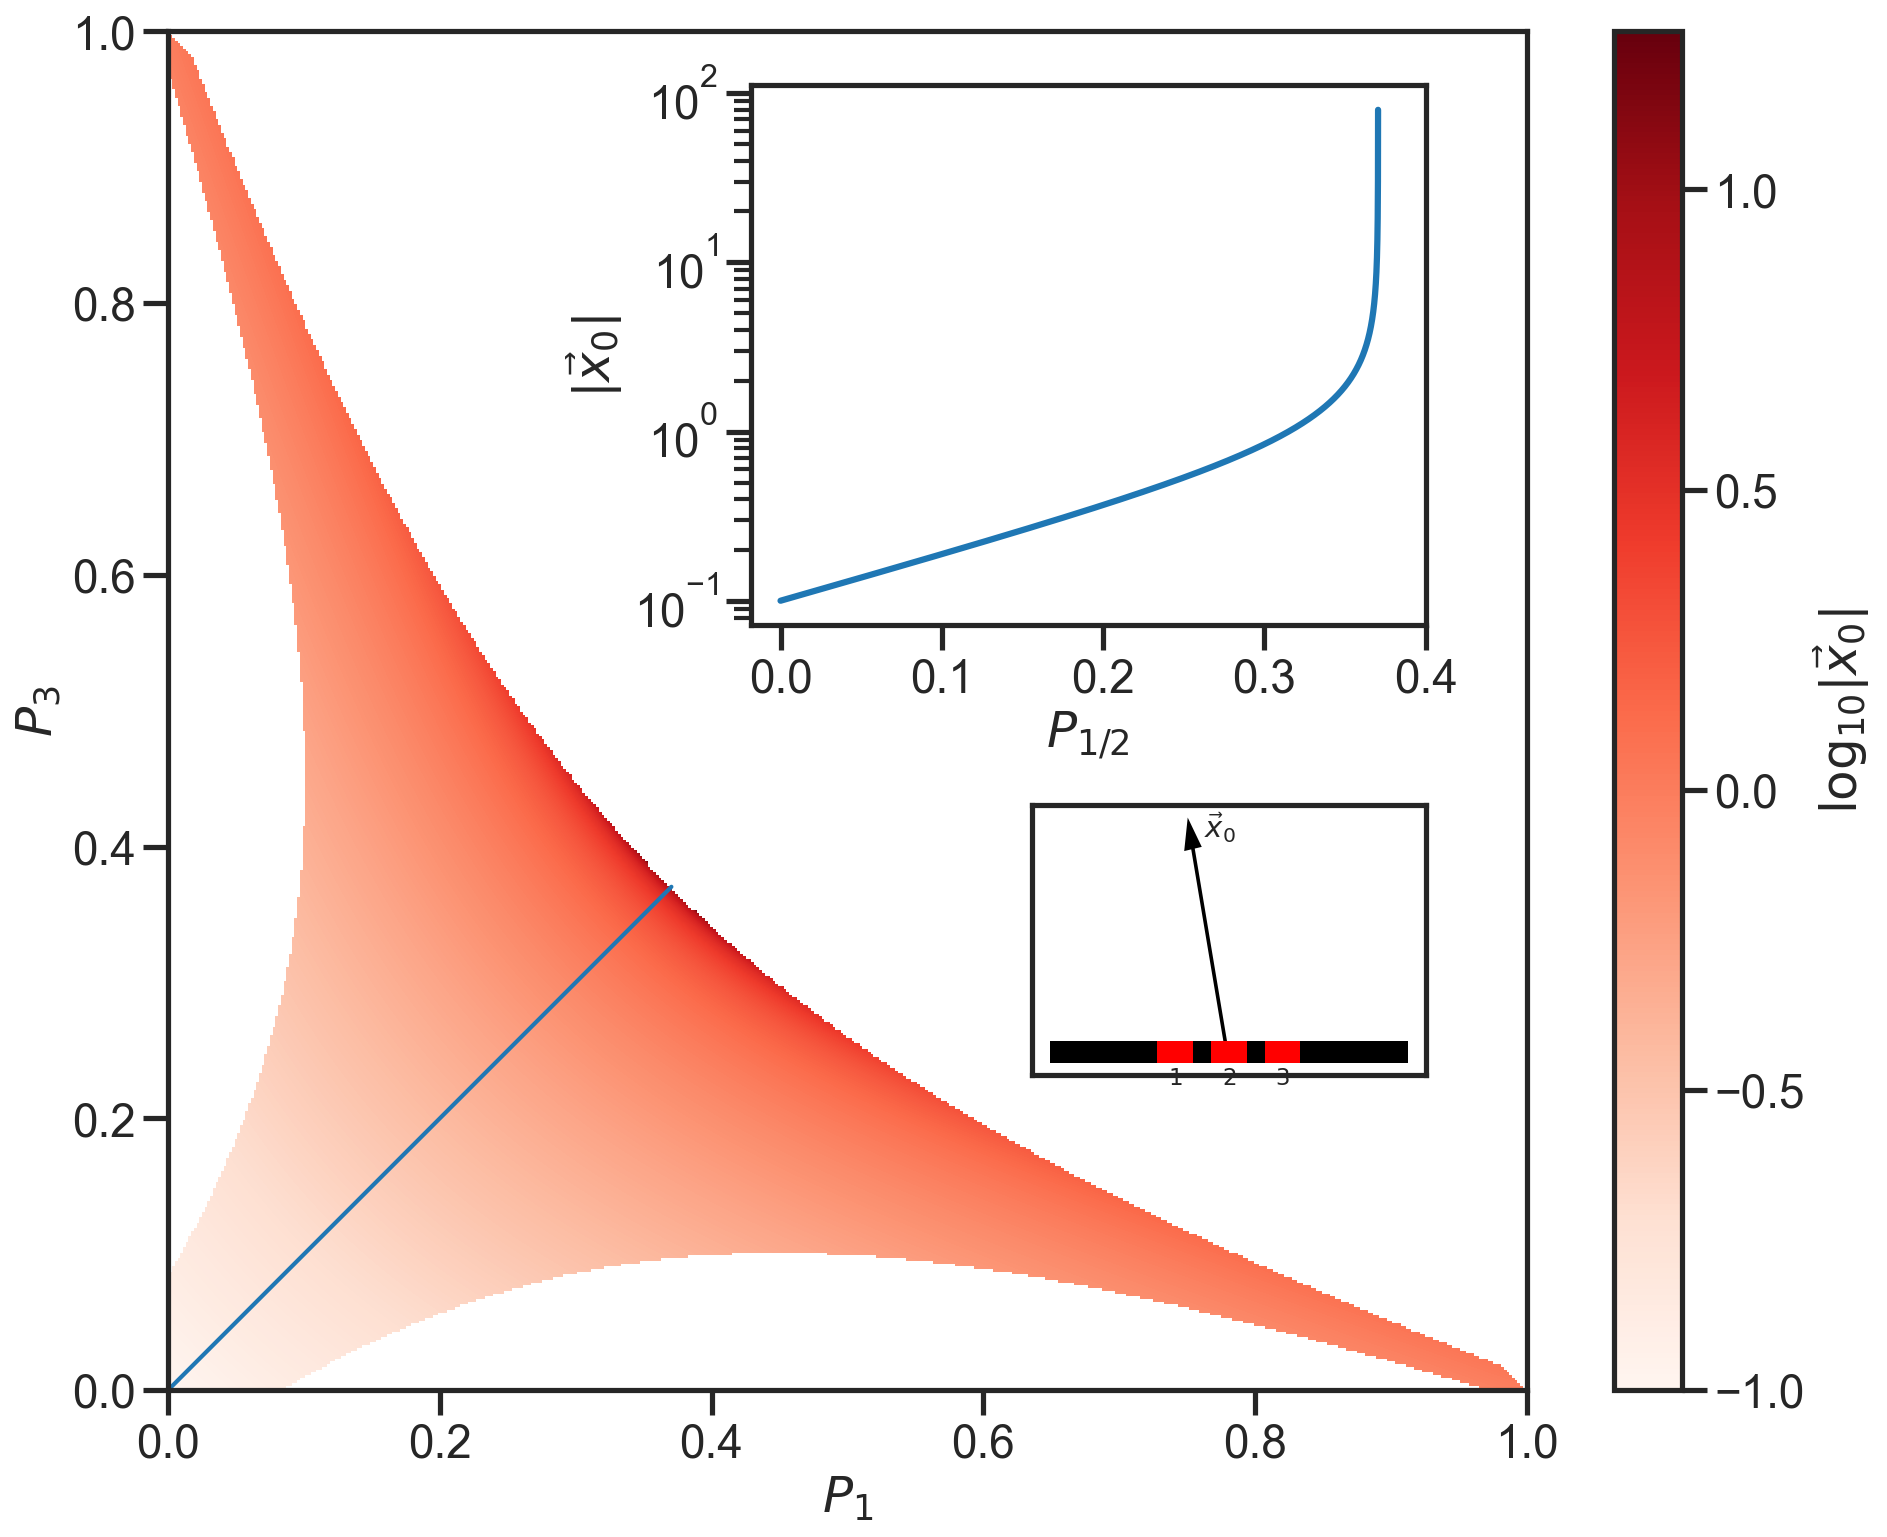

In [13]:
plt.figure(figsize=(15, 12), dpi=150)
ax = plt.subplot(111)
im = ax.imshow(np.log10(np.linalg.norm(hs_x0, axis=0)), extent=(0,1,0,1), origin='lower', vmin=-1,
               interpolation='bilinear', cmap=plt.cm.Reds)
cbar = plt.colorbar(im)
ax.set_xlabel("$P_1$")
ax.set_ylabel("$P_3$")

last_p = hs_p_1d[np.isfinite(hs_x0_1d[0])][-1]
ax.plot([0,last_p], [0,last_p], lw=2)

cbar.set_label(r"$\log_{10}|\vec{x}_0|$")
inset = plt.axes([.4, .55, .3, .3], facecolor='white')
inset.plot(hs_p_1d, np.linalg.norm(hs_x0_1d, axis=0))
inset.semilogy()
inset.set_xticks([0, 0.1, 0.2, 0.3, 0.4])
inset.set_xlabel("$P_{1/2}$")
inset.set_ylabel(r"$|\vec{x}_0|$")

scheme = plt.axes([0.525, 0.3, 0.175, 0.15], facecolor='white')
scheme.arrow(0.5, 0.2, -0.1, 0.5, width=0.01, edgecolor='none', facecolor='black',
             head_width=0.05, zorder=-1)
scheme.add_patch(plt.Rectangle((0., 0.2), 1., 0.05, edgecolor='none', facecolor='black'))
scheme.add_patch(plt.Rectangle((0.3, 0.2), 0.1, 0.05, edgecolor='none', facecolor='red'))
scheme.add_patch(plt.Rectangle((0.45, 0.2), 0.1, 0.05, edgecolor='none', facecolor='red'))
scheme.add_patch(plt.Rectangle((0.6, 0.2), 0.1, 0.05, edgecolor='none', facecolor='red'))
scheme.text(0.35, 0.19, "$1$", ha='center', va='top', fontdict=dict(fontsize=11))
scheme.text(0.5, 0.19, "$2$", ha='center', va='top', fontdict=dict(fontsize=11))
scheme.text(0.65, 0.19, "$3$", ha='center', va='top', fontdict=dict(fontsize=11))
scheme.text(0.52, 0.75, r"$\vec{x}_0$", ha='right', va='center', fontdict=dict(fontsize=14))
scheme.set_xticks([])
scheme.set_yticks([])

#plt.savefig("inverse_3win_halfspace.eps")

# Three receptors, disk

Create `findsource.TwoReceptors` object, with the Green's function for a disk `findsource.G_D`, and the receptors positioned at $(1, 0)$, $(\cos[-2\pi/3], \sin[-2\pi/3])$ and $(\cos[2\pi/3], \sin[2\pi/3])$. Note that we pass `disk=True` to set probailities for inside the disk to invalid.

In [14]:
d_t = findsource.ThreeReceptors(
    x=[(1,0), (np.cos(-2*np.pi/3.), np.sin(-2*np.pi/3.)), (np.cos(2*np.pi/3.), np.sin(2*np.pi/3.))],
    eps=0.1, G=findsource.G_D,
    guesses=[(3*np.cos(a), 3*np.sin(a)) for a in np.linspace(0, 2*np.pi, 6, endpoint=False)],
    disk=True)

Show the contour lines for the probabilities of each window. The point where all three contours intersect is the recovered source position

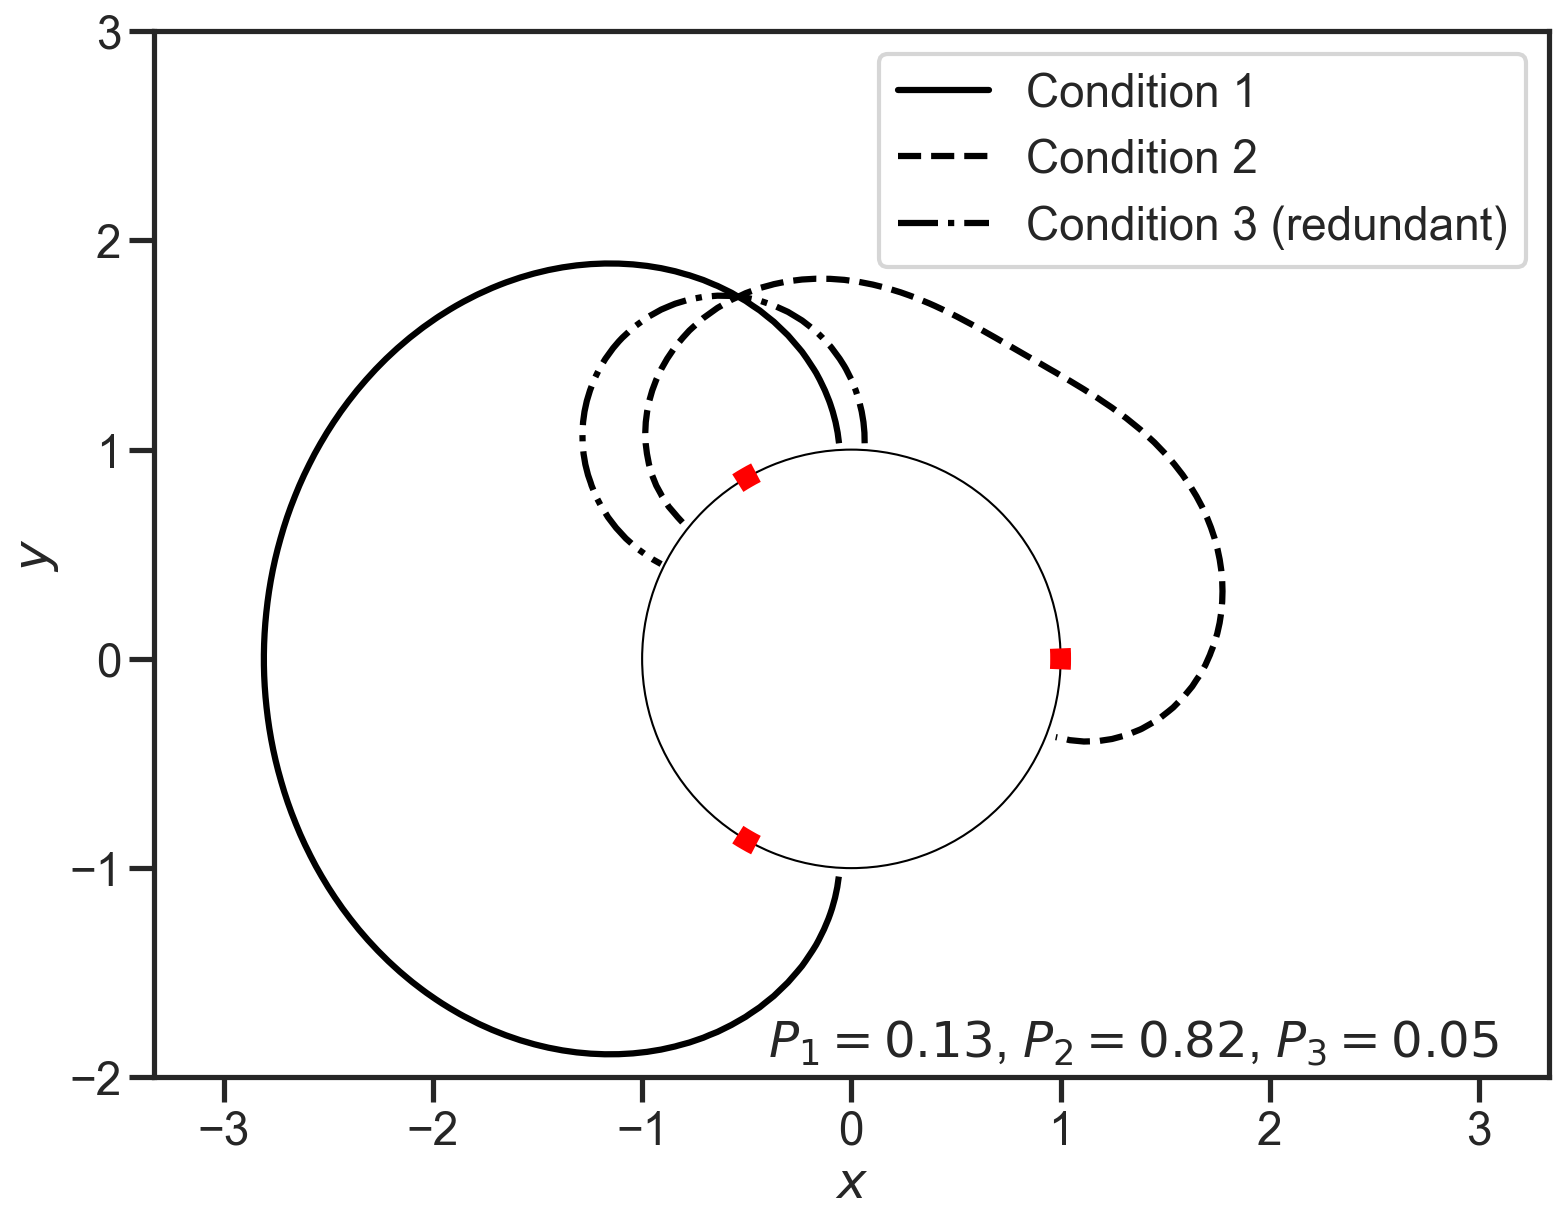

In [15]:
plt.figure(figsize=(12, 12), dpi=150)
ax = plt.subplot(111)
from matplotlib.patches import Arc

d_cont_x = np.linspace(-2.5, 2.5, 100) * 4./3.
d_cont_y = np.linspace(-2, 3, 100)
d_cont_P = [0.13,0.05,0.82]
d_cont_xx = np.array(np.meshgrid(d_cont_x, d_cont_y))
flat = d_cont_xx.reshape((2,-1))
back = np.zeros((3, flat.shape[1]))
for i in range(flat.shape[1]):
    u = d_t.evaluate(flat[:, i]) - d_cont_P
    back[:, i] = u
d_cont_levels = back.reshape((3, d_cont_xx.shape[1], d_cont_xx.shape[2]))
plt.contour(d_cont_levels[0], [0.0], extent=(d_cont_x[0], d_cont_x[-1], d_cont_y[0], d_cont_y[-1]), colors=['black'],
            linestyles=['-'])
plt.contour(d_cont_levels[1], [0.0], extent=(d_cont_x[0], d_cont_x[-1], d_cont_y[0], d_cont_y[-1]), colors=['black'],
            linestyles=['--'])
plt.contour(d_cont_levels[2], [0.0], extent=(d_cont_x[0], d_cont_x[-1], d_cont_y[0], d_cont_y[-1]), colors=['black'],
            linestyles=['-.'], )

ax.add_patch(Arc((0,0), 2, 2, 0, 0, 360, lw=1., color='black'))
for x in d_t.x:
    angle = np.arctan2(x[1], x[0])*180./np.pi
    da = d_t.eps/2.*180./np.pi
    ax.add_patch(Arc((0,0), 2, 2, 0, angle-da, angle+da, lw=10., color='red'))

    plt.legend(
    [plt.Line2D([0,0],[0,0],color='black',ls='-'),
     plt.Line2D([0,0],[0,0],color='black',ls='--'),
     plt.Line2D([0,0],[0,0],color='black',ls='-.')],
    ['Condition 1', 'Condition 2', 'Condition 3 (redundant)'],
    loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text(-0.4, -1.9, "$P_1={}$, $P_2={}$, $P_3={}$".format(d_cont_P[0], d_cont_P[2], d_cont_P[1]), ha='left')
ax.set_aspect('equal')

#plt.savefig("inverse_3win_disk_curves.pdf")

Calculate the source distance for the whole range of permissible probability values $P_1$, $P_3$ and $P_2=1-P_1-P_3$.

In [16]:
d_pt = np.linspace(0, 1, 500)
d_p1, d_p2 = np.meshgrid(d_pt, d_pt)
mask = (d_p1+d_p2) < 1.0
d_P = np.array([1.-d_p1-d_p2, d_p1, d_p2])
d_x0 = float('NaN')*np.ones((2, d_P.shape[1], d_P.shape[2]))
d_x0[:, mask] = d_t.scan_P(d_P[:, mask])

  0%|          | 0/125026 [00:00<?, ?it/s]

Do the same, but only along the line $P_1=P_3$.

In [17]:
d_p_1d = np.linspace(0, 1./3., 1000)
#d_p_1d = 1./3.-np.logspace(-np.log10(3.)*10, -np.log10(3.), 10000)[::-1]
d_P_1d = np.array([1.-2*d_p_1d, d_p_1d, d_p_1d])
d_x0_1d = float('NaN')*np.ones((2, d_P_1d.shape[1]))
d_x0_1d = d_t.scan_P(d_P_1d)

  0%|          | 0/1000 [00:00<?, ?it/s]

Show the distance of the source as a function of $P_1$ and $P_3$.

[]

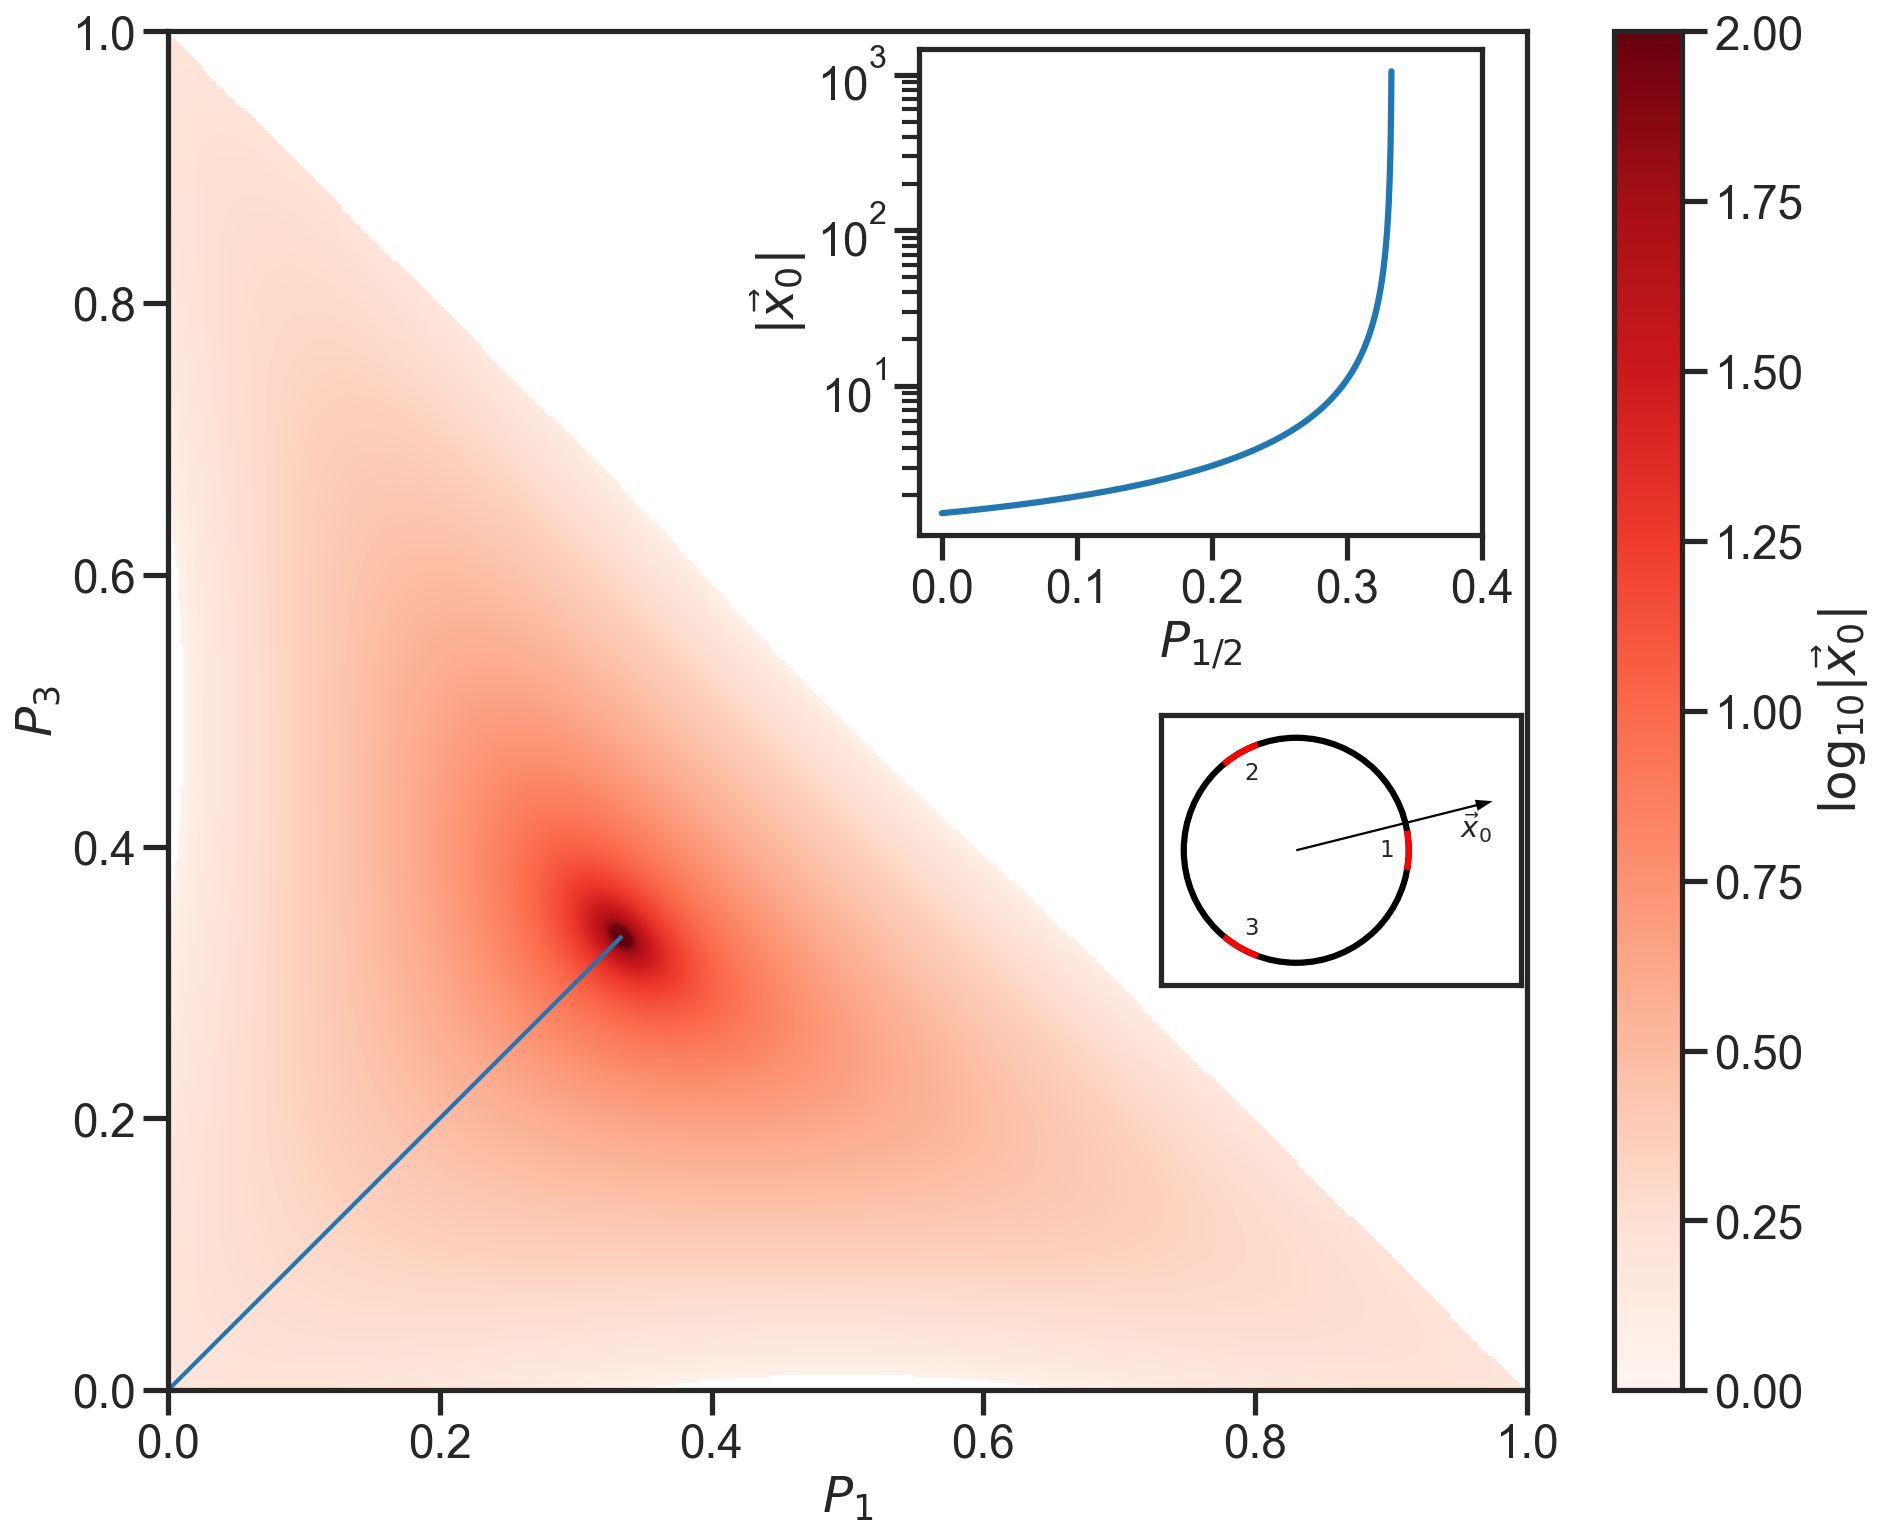

In [65]:
from matplotlib.patches import Arc
plt.figure(figsize=(15, 12), dpi=150)
ax = plt.subplot(111)
im = ax.imshow(np.log10(np.linalg.norm(d_x0, axis=0)), extent=(0,1,0,1), origin='lower', vmin=0, vmax=2,
               interpolation='bilinear', cmap=plt.cm.Reds)
cbar = plt.colorbar(im)
ax.set_xlabel("$P_1$")
ax.set_ylabel("$P_3$")
# ax.plot([1./3.], [1./3.], 'o', color='blue')

ax.plot([0,1./3.], [0,1./3.], lw=2)

cbar.set_label(r"$\log_{10}|\vec{x}_0|$")
inset = plt.axes([.475, .6, .25, .27], facecolor='white')
inset.plot(d_p_1d, np.linalg.norm(d_x0_1d, axis=0))
inset.semilogy()
inset.set_xticks([0, 0.1, 0.2, 0.3, 0.4])
inset.set_xlabel("$P_{1/2}$")
inset.set_ylabel(r"$|\vec{x}_0|$")

scheme = plt.axes([0.575, 0.35, 0.175, 0.15], facecolor='white')
scheme.arrow(0., 0., 0.8, 0.2, width=0.01, edgecolor='none', facecolor='black',
             head_width=0.05, zorder=-1)
scheme.add_patch(plt.Circle((0., 0.), radius=0.5, edgecolor='black', facecolor='none', lw=3))
scheme.add_patch(Arc((0., 0.), 1, 1,  0., -10, 10, edgecolor='red', facecolor='none', lw=3))
scheme.add_patch(Arc((0., 0.), 1, 1,  0., -130, -110, edgecolor='red', facecolor='none', lw=3))
scheme.add_patch(Arc((0., 0.), 1, 1,  0., 110, 130, edgecolor='red', facecolor='none', lw=3))
# scheme.add_patch(plt.Rectangle((0., 0.2), 1., 0.05, edgecolor='none', facecolor='black'))
# scheme.add_patch(plt.Rectangle((0.3, 0.2), 0.1, 0.05, edgecolor='none', facecolor='red'))
# scheme.add_patch(plt.Rectangle((0.45, 0.2), 0.1, 0.05, edgecolor='none', facecolor='red'))
# scheme.add_patch(plt.Rectangle((0.6, 0.2), 0.1, 0.05, edgecolor='none', facecolor='red'))
scheme.text(0.4, 0., "$1$", ha='center', va='center', fontdict=dict(fontsize=11))
scheme.text(0.4*np.cos(2*np.pi/3.), 0.4*np.sin(2*np.pi/3.), "$2$", ha='center', va='center', fontdict=dict(fontsize=11))
scheme.text(0.4*np.cos(-2*np.pi/3.), 0.4*np.sin(-2*np.pi/3.), "$3$", ha='center', va='center', fontdict=dict(fontsize=11))
scheme.text(0.8, 0.18, r"$\vec{x}_0$", ha='center', va='top', fontdict=dict(fontsize=14))
scheme.axis(xmin=-0.6, xmax=1, ymin=-0.6, ymax=0.6)
scheme.set_aspect('equal')
scheme.set_xticks([])
scheme.set_yticks([])

#plt.savefig("inverse_3win_disk.eps")
#plt.savefig("inverse_3win_disk.pdf")